**Extracting Files from a ZIP Archive Using Python's zipfile Module**

In [ ]:
import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')
files.extractall('directory to extract')
files.close()

**Getting the Current Working Directory in Python Using the os Module**

In [ ]:
import os
print("Current working directory:", os.getcwd())

Found 3631 files belonging to 2 classes.
Using 2905 files for training.
Found 348 files belonging to 2 classes.
Using 69 files for validation.
Found 169 files belonging to 2 classes.
Class names of training dataset: ['images', 'labels']

Information about each batch in the training dataset:
Batch 1: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 2: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 3: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 4: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 5: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 6: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 7: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 8: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 10
Batch 9: Images shape - (10, 96, 96, 3), Labels shape - (10,), Batch Size - 

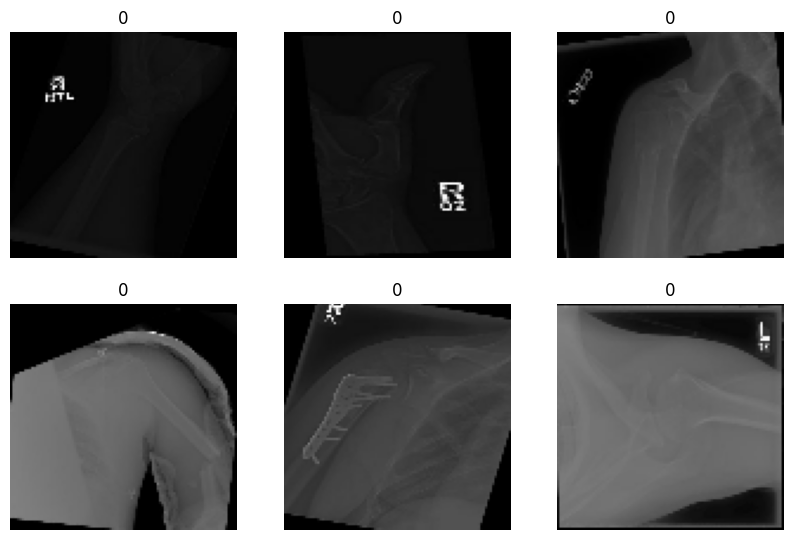

In [32]:
import zipfile as zf
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Extract the zip file (Only need to do this once)
# files = zf.ZipFile("archive.zip", 'r')
# files.extractall('directory to extract')
# files.close()

# Define directories
Test = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Roberts Work - PrePro & Size Change/Dataset/test/'
Train = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Roberts Work - PrePro & Size Change/Dataset/train/'
Valid = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Roberts Work - PrePro & Size Change/Dataset/valid/'

# Define constants
image_size = (96, 96)
batch_size = 10

# Function to load dataset from directory with error handling
def load_dataset_from_directory(directory, subset=None):
    try:
        dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory,
            batch_size=batch_size,
            image_size=image_size,
            validation_split=None if subset is None else 0.2,
            subset=subset,
            shuffle=True,
            seed=42
        )
        return dataset
    except Exception as e:
        print(f"Error loading dataset from directory {directory}: {e}")
        return None

# Load training dataset
train_dataset = load_dataset_from_directory(Train, subset="training")

# Load validation dataset
val_dataset = load_dataset_from_directory(Valid, subset="validation")

# Load test dataset
test_dataset = load_dataset_from_directory(Test)

# Print class names of training dataset
if train_dataset:
    class_names = train_dataset.class_names
    print("Class names of training dataset:", class_names)
    print()  # Print an empty line for spacing
else:
    print("Error loading training dataset.")

# Print information about each batch in the training dataset
if train_dataset:
    print("Information about each batch in the training dataset:")
    for batch_idx, (images, labels) in enumerate(train_dataset):
        batch_size = images.shape[0]  # Get the batch size
        print(f"Batch {batch_idx + 1}: Images shape - {images.shape}, Labels shape - {labels.shape}, Batch Size - {batch_size}")
else:
    print("Error loading training dataset.")

# Check if datasets are loaded successfully
if train_dataset and val_dataset and test_dataset:
    print("Datasets loaded successfully.")
else:
    print("Error loading datasets.")
    
# Take one batch from the training dataset
for images, labels in train_dataset.take(1):
    # Display a grid of 6 images from the batch
    plt.figure(figsize=(10, 10))
    num_images = min(6, images.shape[0])  # Determine the number of images to display (up to 6)
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy())  # Include the label as the title
        plt.axis("off")
    plt.show()